# Coding Co-lab Day 4

[session link](https://eds-217-essential-python.github.io/course-materials/coding-colabs/4b_pandas_dataframes.html)

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-09-17/national_parks.csv"
parks_df = pd.read_csv(url)

## Data exploration and cleaning

How many rows and columns does the DataFrame have?

What are the column names?

What data types are used in each column?

Are there any missing values in the DataFrame?

Remove the rows where year is Total (these are summary rows we don’t need for our analysis).

Convert the year column to numeric type.

In [24]:
#How many rows and columns does the DataFrame have?
print("Shape:", parks_df.shape)

#What are the column names?
print("\nColumns:", parks_df.columns)

#What data types are used in each column?
print("\nData types:\n", parks_df.dtypes)

#Are there any missing values in the DataFrame?
print("\n Missing Values:\n", parks_df.isnull().sum())

#Remove the rows where year is Total (these are summary rows we don’t need for our analysis).
parks_df = parks_df[parks_df['year'] != 'Total']

#Convert the year column to numeric type.
parks_df['year'] = parks_df['year'].astype(int)


Shape: (21174, 12)

Columns: Index(['year', 'gnis_id', 'geometry', 'metadata', 'number_of_records',
       'parkname', 'region', 'state', 'unit_code', 'unit_name', 'unit_type',
       'visitors'],
      dtype='object')

Data types:
 year                 float64
gnis_id               object
geometry              object
metadata              object
number_of_records      int64
parkname              object
region                object
state                 object
unit_code             object
unit_name             object
unit_type             object
visitors             float64
dtype: object

 Missing Values:
 year                    0
gnis_id                 0
geometry                0
metadata             2663
number_of_records       0
parkname             2176
region                  0
state                   0
unit_code               0
unit_name               0
unit_type               0
visitors                0
dtype: int64


## Basic filtering and analysis


In [53]:
#Create a new DataFrame containing only data for the years 2000-2015 
#and only data for National Parks (unit_type is National Park)
new_parks = parks_df[
    (parks_df['year'] >= 2000) & (parks_df['year'] <= 2015) & 
    (parks_df['unit_type'] == 'National Park')
]

# new_parks = parks_df['year'].isin(range(2000, 2016)) 
# also works and is shorter!

new_parks.head()

,year,gnis_id,geometry,metadata,number_of_records,parkname,region,state,unit_code,unit_name,unit_type,visitors
378,2002,1966567,MULTIPOLYGON,http://nrdata.nps.gov/programs/Lands/NPSA_META...,1,National Park of American Samoa,PW,AS,NPSA,National Park of American Samoa,National Park,1938.0
1146,2015,1163670,POLYGON,NaN,1,Crater Lake,PW,OR,CRLA,Crater Lake National Park,National Park,614712.0
1149,2015,1530459,MULTIPOLYGON,NaN,1,Olympic,PW,WA,OLYM,Olympic National Park,National Park,3263761.0
1151,2015,578853,MULTIPOLYGON,NaN,1,NaN,NE,ME,ACAD,Acadia National Park,National Park,2811184.0
1154,2015,1377082,POLYGON,NaN,1,NaN,IM,TX,BIBE,Big Bend National Park,National Park,381747.0


In [37]:
#Find the total number of visitors across all National Parks for each year from 2000-2015.

new_parks['visitors'].sum()

1050226400.0

In [40]:
# Calculate the average yearly visitors for each National Park during the 2000-2015 period.

new_parks.groupby('unit_name')['visitors'].mean()

unit_name
Acadia National Park                               2.360204e+06
Arches National Park                               9.433541e+05
Badlands National Park                             9.171606e+05
Big Bend National Park                             3.385452e+05
Biscayne National Park                             5.086311e+05
                                                       ...     
Wolf Trap National Park for the Performing Arts    4.898754e+05
Wrangell-St. Elias National Park                   5.886169e+04
Yellowstone National Park                          3.184916e+06
Yosemite National Park                             3.590033e+06
Zion National Park                                 2.732917e+06
Name: visitors, Length: 61, dtype: float64

In [45]:
#Identify the top 5 most visited National Parks (based on total visitors) during the 2000-2015 period.

new_parks.groupby('unit_name')['visitors'].sum().sort_values(ascending=False).head()

unit_name
Great Smoky Mountains National Park    151938054.0
Grand Canyon National Park              70836419.0
Yosemite National Park                  57440533.0
Yellowstone National Park               50958648.0
Olympic National Park                   50201663.0
Name: visitors, dtype: float64

year
1904      120690.0
1905      140954.0
1906       30569.0
1907       32935.0
1908       42768.0
           ...    
2012    65919193.0
2013    64486815.0
2014    69847696.0
2015    76258329.0
2016    83920334.0
Name: visitors, Length: 113, dtype: float64


<Axes: xlabel='year'>

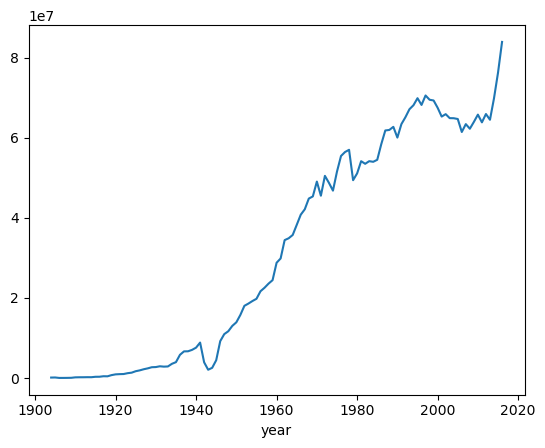

In [52]:
nat_df = parks_df[parks_df['unit_type'] == 'National Park']

plot_df = nat_df.groupby('year')['visitors'].sum()
print(plot_df)

plot_df.plot()